<a href="https://colab.research.google.com/github/dev30k/Google-colabs/blob/main/heart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import numpy as np
import pandas as pd
import seaborn as sns

In [36]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')
!ls "/content/drive/My Drive"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
 Chest_Radiography	  india.gsheet		   TBDatabase
 chest_xray		  montgonemry		   TUBER
'Colab Notebooks'	  oracleSQL		  'Untitled document (1).gdoc'
 FinalVersion		 'SCI-ULTRA PROFILE.pdf'  'Untitled document.gdoc'
 heart_2020_cleaned.csv   shenzhen_metadata.csv


In [37]:
main = "/content/drive/My Drive/heart_2020_cleaned.csv"

In [38]:
data = pd.read_csv(main)

In [39]:
data.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [40]:
data.dtypes

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

In [41]:
data.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [42]:
data.head(5)
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data['HeartDisease']=labelencoder.fit_transform(data['HeartDisease'])
data['Smoking']=labelencoder.fit_transform(data['Smoking'])
data['Sex']=labelencoder.fit_transform(data['Sex'])
data['Race']=labelencoder.fit_transform(data['Race'])
data['AlcoholDrinking']=labelencoder.fit_transform(data['AlcoholDrinking'])
data['Stroke'] = labelencoder.fit_transform(data['Stroke'])
data['DiffWalking'] = labelencoder.fit_transform(data['DiffWalking'])
data['Diabetic'] = labelencoder.fit_transform(data['Diabetic'])
data['PhysicalActivity'] = labelencoder.fit_transform(data['PhysicalActivity'])
data['Asthma'] = labelencoder.fit_transform(data['Asthma'])
data['KidneyDisease'] = labelencoder.fit_transform(data['KidneyDisease'])
data['SkinCancer'] = labelencoder.fit_transform(data['SkinCancer'])
data['AgeCategory'] = labelencoder.fit_transform(data['AgeCategory'])
data['GenHealth'] = labelencoder.fit_transform(data['GenHealth'])




In [43]:
data.head(5)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,7,5,2,1,4,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,12,5,0,1,4,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,9,5,2,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,11,5,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,4,5,0,1,4,8.0,0,0,0


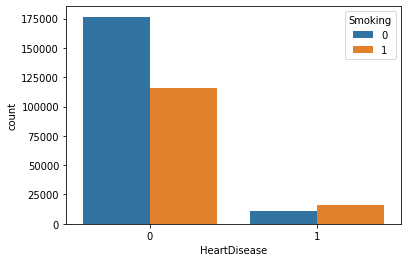

In [44]:
sns.countplot(x="HeartDisease",hue="Smoking",data=data)

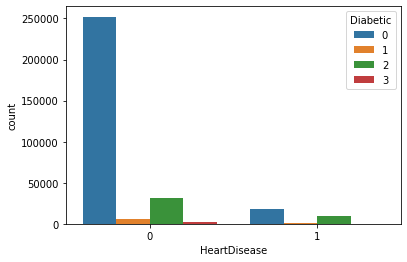

In [45]:
sns.countplot(x="HeartDisease",hue="Diabetic",data=data)

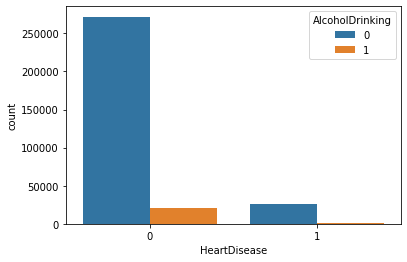

In [46]:
sns.countplot(x="HeartDisease",hue="AlcoholDrinking",data=data)

In [47]:
data.corr().style.background_gradient(cmap='coolwarm')

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
HeartDisease,1.000000,0.051803,0.107764,-0.032080,0.196835,0.170721,0.028591,0.201258,0.070040,0.233432,0.034854,0.168553,-0.100030,-0.011062,0.008327,0.041444,0.145197,0.093317
BMI,0.051803,1.000000,0.023118,-0.038816,0.019733,0.109788,0.064131,0.181678,0.026940,-0.004744,-0.037424,0.202472,-0.150616,0.035932,-0.051822,0.092345,0.050768,-0.033644
Smoking,0.107764,0.023118,1.000000,0.111768,0.061226,0.115352,0.085157,0.120074,0.085052,0.128331,0.065499,0.053847,-0.097174,0.020625,-0.030336,0.024149,0.034920,0.033977
AlcoholDrinking,-0.032080,-0.038816,0.111768,1.000000,-0.019858,-0.017254,0.051282,-0.035328,0.004200,-0.059528,0.036702,-0.057372,0.017487,0.001629,-0.005065,-0.002202,-0.028280,-0.005702
Stroke,0.196835,0.019733,0.061226,-0.019858,1.000000,0.137014,0.046467,0.174143,-0.003091,0.137822,-0.003956,0.101518,-0.079455,-0.009335,0.011900,0.038866,0.091167,0.048116
PhysicalHealth,0.170721,0.109788,0.115352,-0.017254,0.137014,1.000000,0.287987,0.428373,-0.040904,0.110763,-0.000847,0.151361,-0.232283,-0.035703,-0.061387,0.117907,0.142197,0.041700
MentalHealth,0.028591,0.064131,0.085157,0.051282,0.046467,0.287987,1.000000,0.152235,-0.100058,-0.155506,-0.014491,0.032945,-0.095808,-0.004412,-0.119717,0.114008,0.037281,-0.033412
DiffWalking,0.201258,0.181678,0.120074,-0.035328,0.174143,0.428373,0.152235,1.000000,-0.068860,0.243263,-0.015831,0.205502,-0.278524,-0.043552,-0.022216,0.103222,0.153064,0.064840
Sex,0.070040,0.026940,0.085052,0.004200,-0.003091,-0.040904,-0.100058,-0.068860,1.000000,-0.067478,0.018855,-0.013456,0.048247,-0.010283,-0.015704,-0.069191,-0.009084,0.013434
AgeCategory,0.233432,-0.004744,0.128331,-0.059528,0.137822,0.110763,-0.155506,0.243263,-0.067478,1.000000,0.163090,0.193745,-0.121687,0.044427,0.104953,-0.058108,0.123190,0.263537


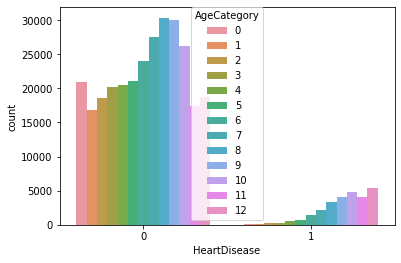

In [48]:
sns.countplot(x="HeartDisease", hue="AgeCategory", data=data)

In [49]:
corr_pairs = data.corr().unstack()
sorted_pairs = corr_pairs.sort_values(kind="quicksort")

print(sorted_pairs)

DiffWalking       PhysicalActivity   -0.278524
PhysicalActivity  DiffWalking        -0.278524
PhysicalHealth    PhysicalActivity   -0.232283
PhysicalActivity  PhysicalHealth     -0.232283
AgeCategory       MentalHealth       -0.155506
                                        ...   
PhysicalActivity  PhysicalActivity    1.000000
GenHealth         GenHealth           1.000000
SleepTime         SleepTime           1.000000
Sex               Sex                 1.000000
SkinCancer        SkinCancer          1.000000
Length: 324, dtype: float64


In [50]:
strong_pairs = sorted_pairs[abs(sorted_pairs) >= 0.1 ]

print(strong_pairs)

DiffWalking       PhysicalActivity   -0.278524
PhysicalActivity  DiffWalking        -0.278524
PhysicalHealth    PhysicalActivity   -0.232283
PhysicalActivity  PhysicalHealth     -0.232283
AgeCategory       MentalHealth       -0.155506
                                        ...   
PhysicalActivity  PhysicalActivity    1.000000
GenHealth         GenHealth           1.000000
SleepTime         SleepTime           1.000000
Sex               Sex                 1.000000
SkinCancer        SkinCancer          1.000000
Length: 110, dtype: float64


In [51]:
y = data.HeartDisease
data.drop(['HeartDisease'],axis=1,inplace=True)
X=data

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2)

In [53]:
from sklearn.tree import DecisionTreeClassifier

In [54]:
DT= DecisionTreeClassifier()
DT.fit(X_train,y_train)

DecisionTreeClassifier()

In [55]:
pred=DT.predict(X_test)
 

In [56]:
from sklearn.metrics  import f1_score,accuracy_score
print(accuracy_score(y_test,pred))
print(f1_score(y_test,pred))

0.8633503858709928
0.24200374661763688


In [ ]:
from sklearn.ensemble import RandomForestClassifier
KN = RandomForestClassifier(n_estimators= 10, criterion="entropy")
KN.fit(X_train,y_train)


In [ ]:
KNp = KN.predict(X_test)

In [34]:
print(accuracy_score(y_test,KNp))
print(f1_score(y_test,KNp))


0.9042389523321117
0.16510359869138497
